Training data shape (60000, 28, 28)
Training labels shape (60000,)
Testing data shape (10000, 28, 28)
Testing labels shape (10000,)


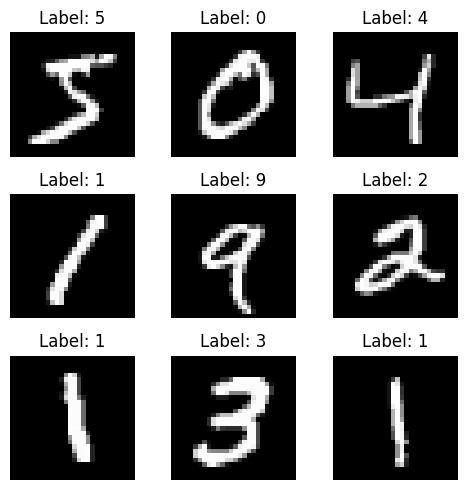

New training shape: (60000, 28, 28, 1)
New testing shape: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9088 - loss: 0.2999 - val_accuracy: 0.9807 - val_loss: 0.0597
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9871 - loss: 0.0419 - val_accuracy: 0.9857 - val_loss: 0.0433
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9918 - loss: 0.0275 - val_accuracy: 0.9907 - val_loss: 0.0264
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9904 - val_loss: 0.0290
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9890 - val_loss: 0.0303
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9840 - loss: 0.0417
Test Accuracy: 0.9890000224113464
Test Loss: 0.030322043225169182
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


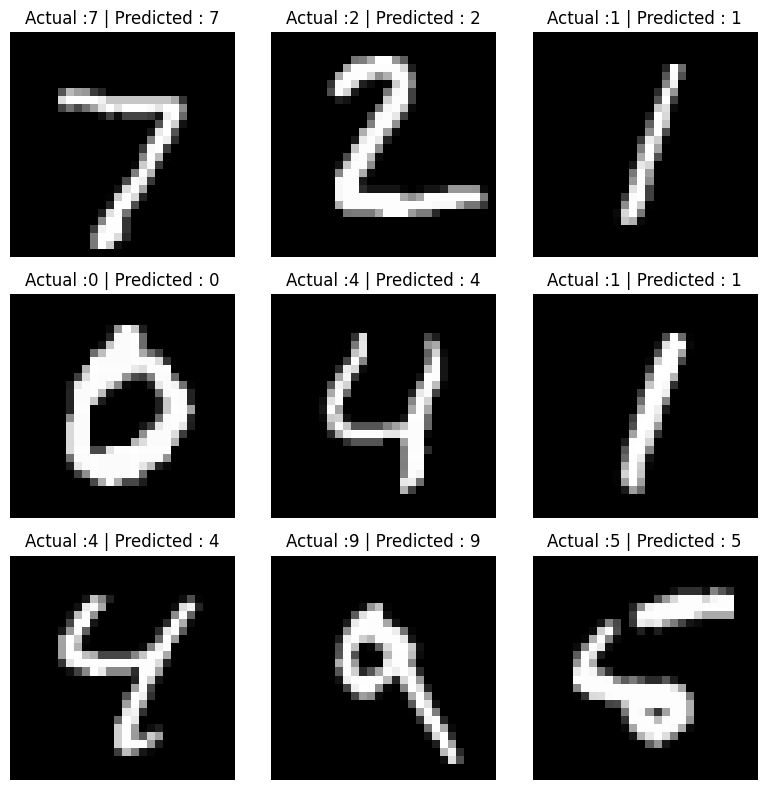

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training data shape',x_train.shape)
print('Training labels shape',y_train.shape)
print('Testing data shape',x_test.shape)
print('Testing labels shape',y_test.shape)
plt.figure(figsize = (5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print('New training shape:',x_train.shape)
print('New testing shape:',x_test.shape)

model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
history = model.fit(
    x_train, y_train , epochs = 5, validation_data = (x_test, y_test)
)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy:',test_accuracy)
print('Test Loss:',test_loss)

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis = 1)
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
  plt.title(f'Actual :{y_test[i]} | Predicted : {predicted_labels[i]}')
  plt.axis('off')
plt.tight_layout()
plt.show()

